# Decision Tree Classifier for Heart Attack Risk Prediction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [ ]:
data_dir = "/content/drive/MyDrive/BAI/heart disease dataset/heart.csv"

### About Dataset


[Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## Exploratory Data Analysis

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv(data_dir)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Visualization

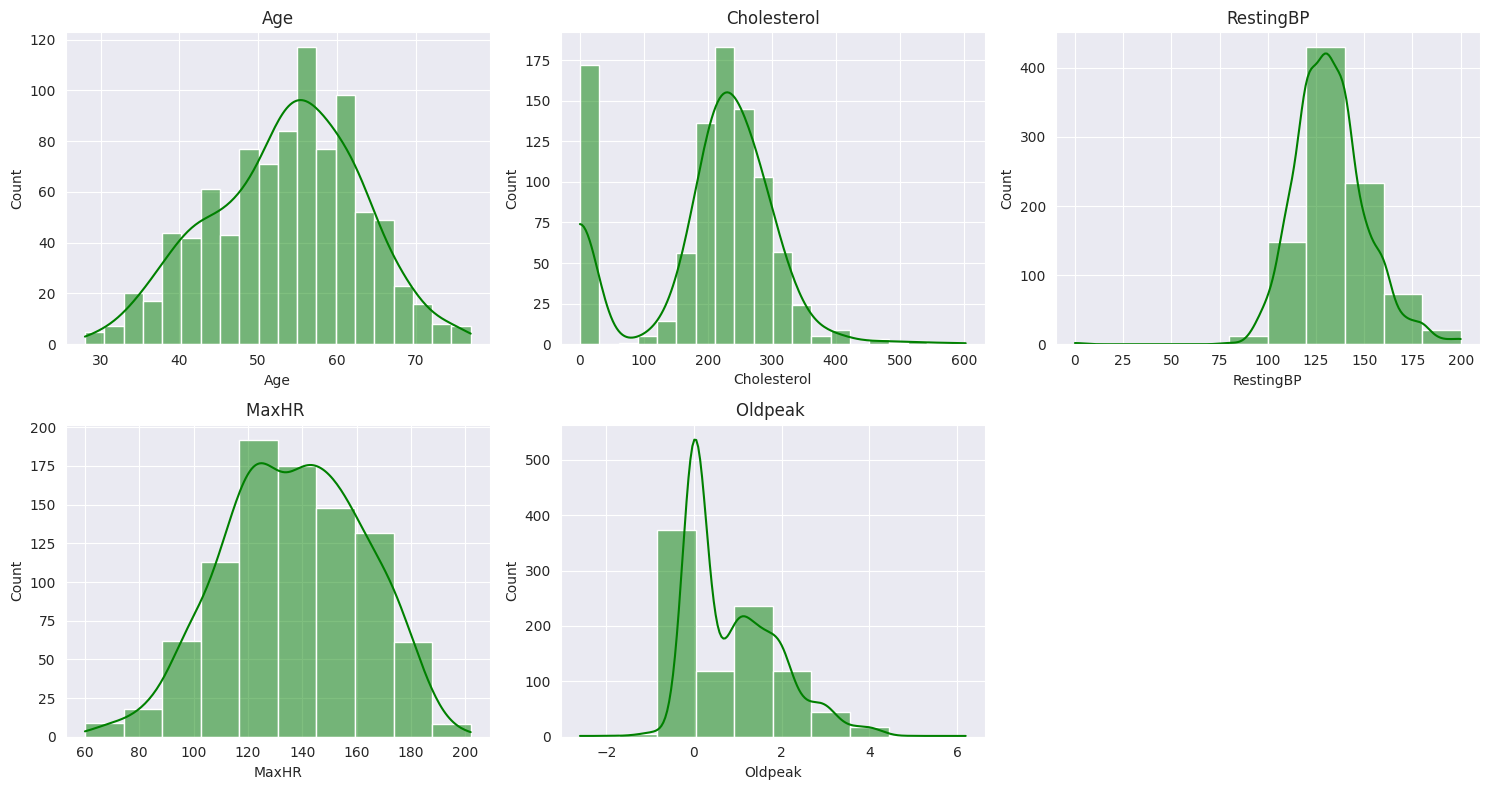

In [ ]:
#Distribusi Histogram untuk data numerik

plt.figure(figsize=(15, 8))

# Age
plt.subplot(2,3,1)
sns.histplot(df, x='Age', bins=20, kde=True, color='green')
plt.title('Age')

# Cholesterol
plt.subplot(2,3,2)
sns.histplot(df, x='Cholesterol', bins=20, kde=True, color='green')
plt.title('Cholesterol')

# RestingBP
plt.subplot(2,3,3)
sns.histplot(df, x='RestingBP', bins=10, kde=True, color='green')
plt.title('RestingBP')


# MaxHR
plt.subplot(2,3,4)
sns.histplot(df, x='MaxHR', bins=10, kde=True, color='green')
plt.title('MaxHR ')


# Oldpeak
plt.subplot(2,3,5)
sns.histplot(df, x='Oldpeak', bins=10, kde=True, color='green')
plt.title('Oldpeak ')


plt.tight_layout()
plt.show()


<Figure size 1500x2000 with 0 Axes>

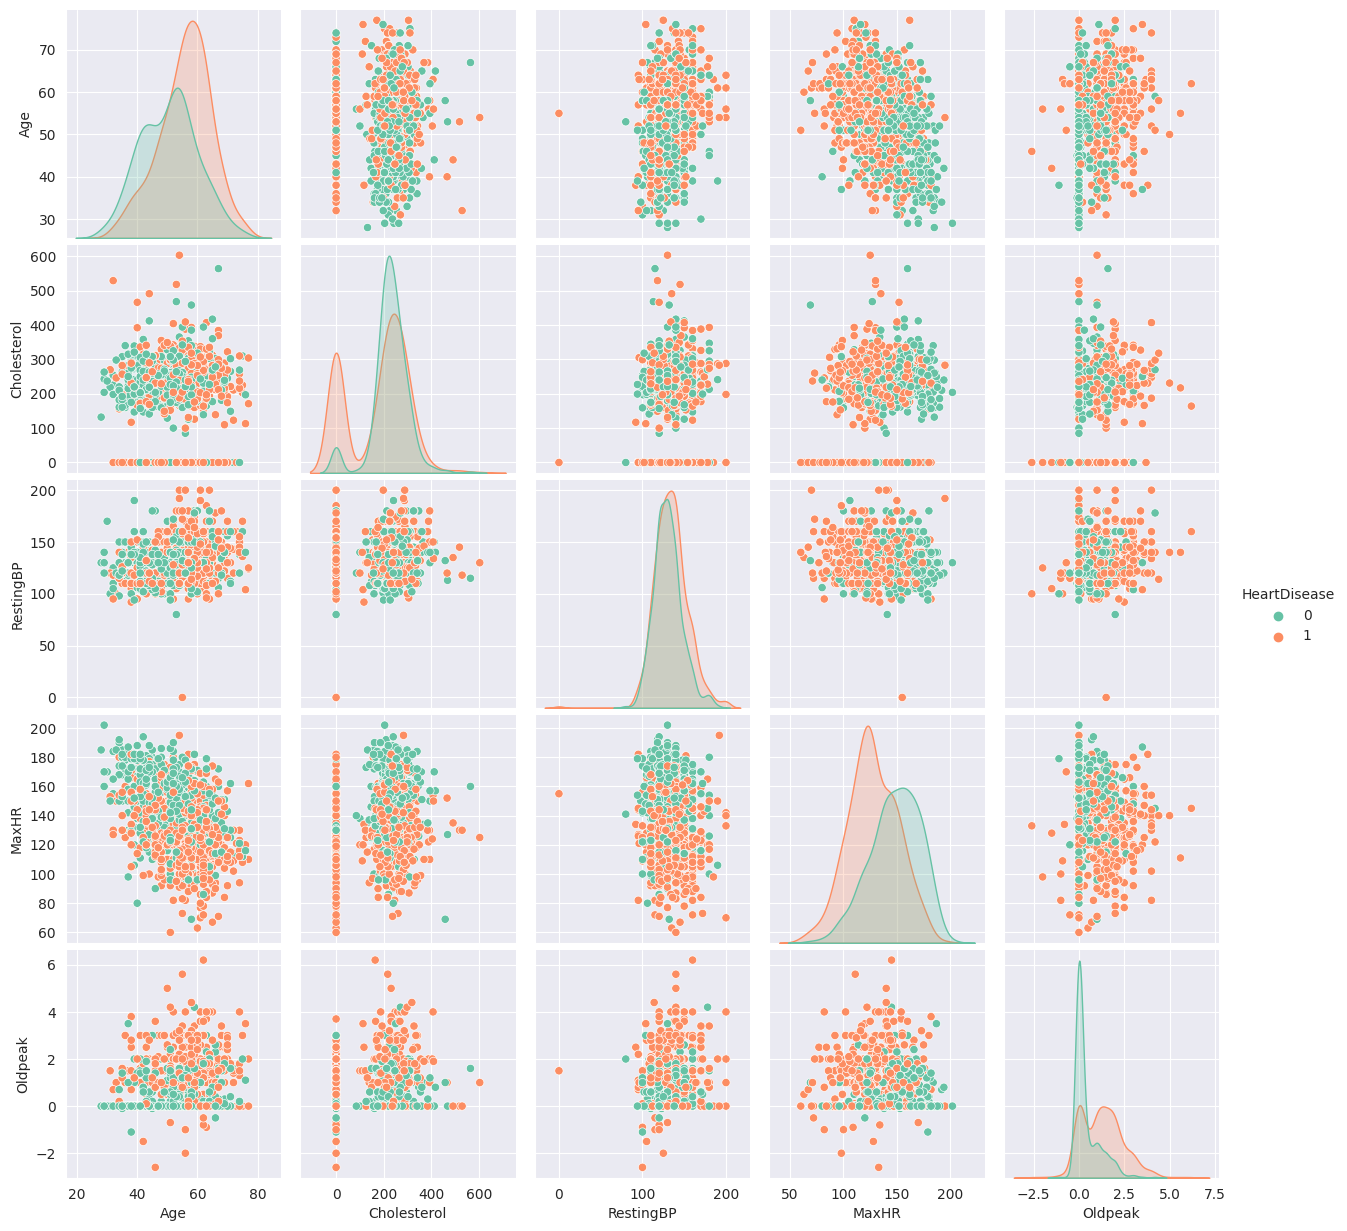

In [ ]:
# Explore relationships with the target variable "Heart Attack Risk"
# Pairwise scatter plots for numerical features
plt.figure(figsize=(15, 20))
sns.pairplot(data=df, vars=['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak'], hue='HeartDisease', diag_kind='kde', palette='Set2')
plt.show()

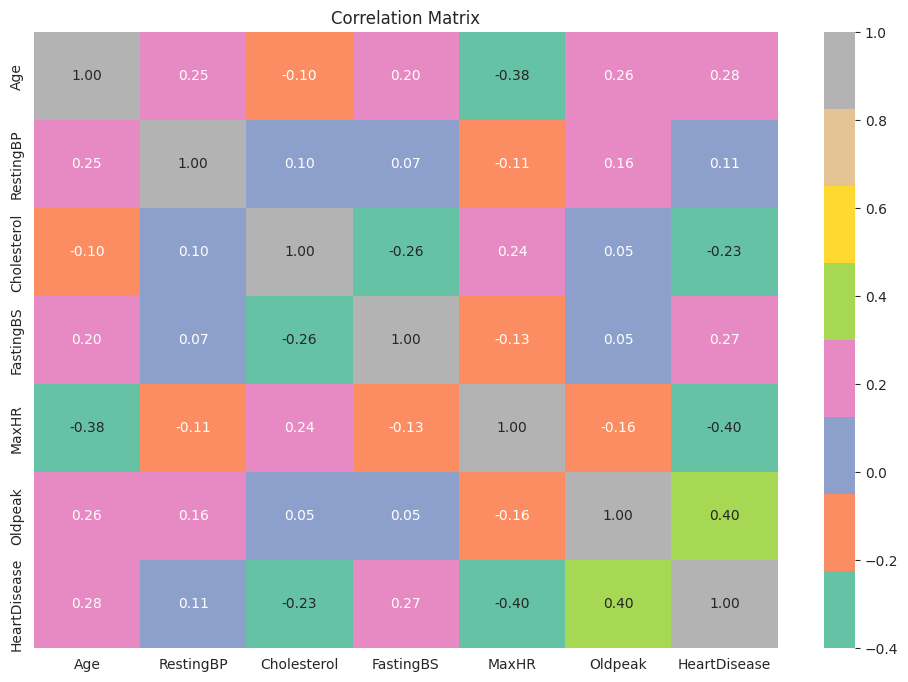

In [ ]:
# Confusion Matrix
# Exclude non-numeric columns before creating the correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Set2', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

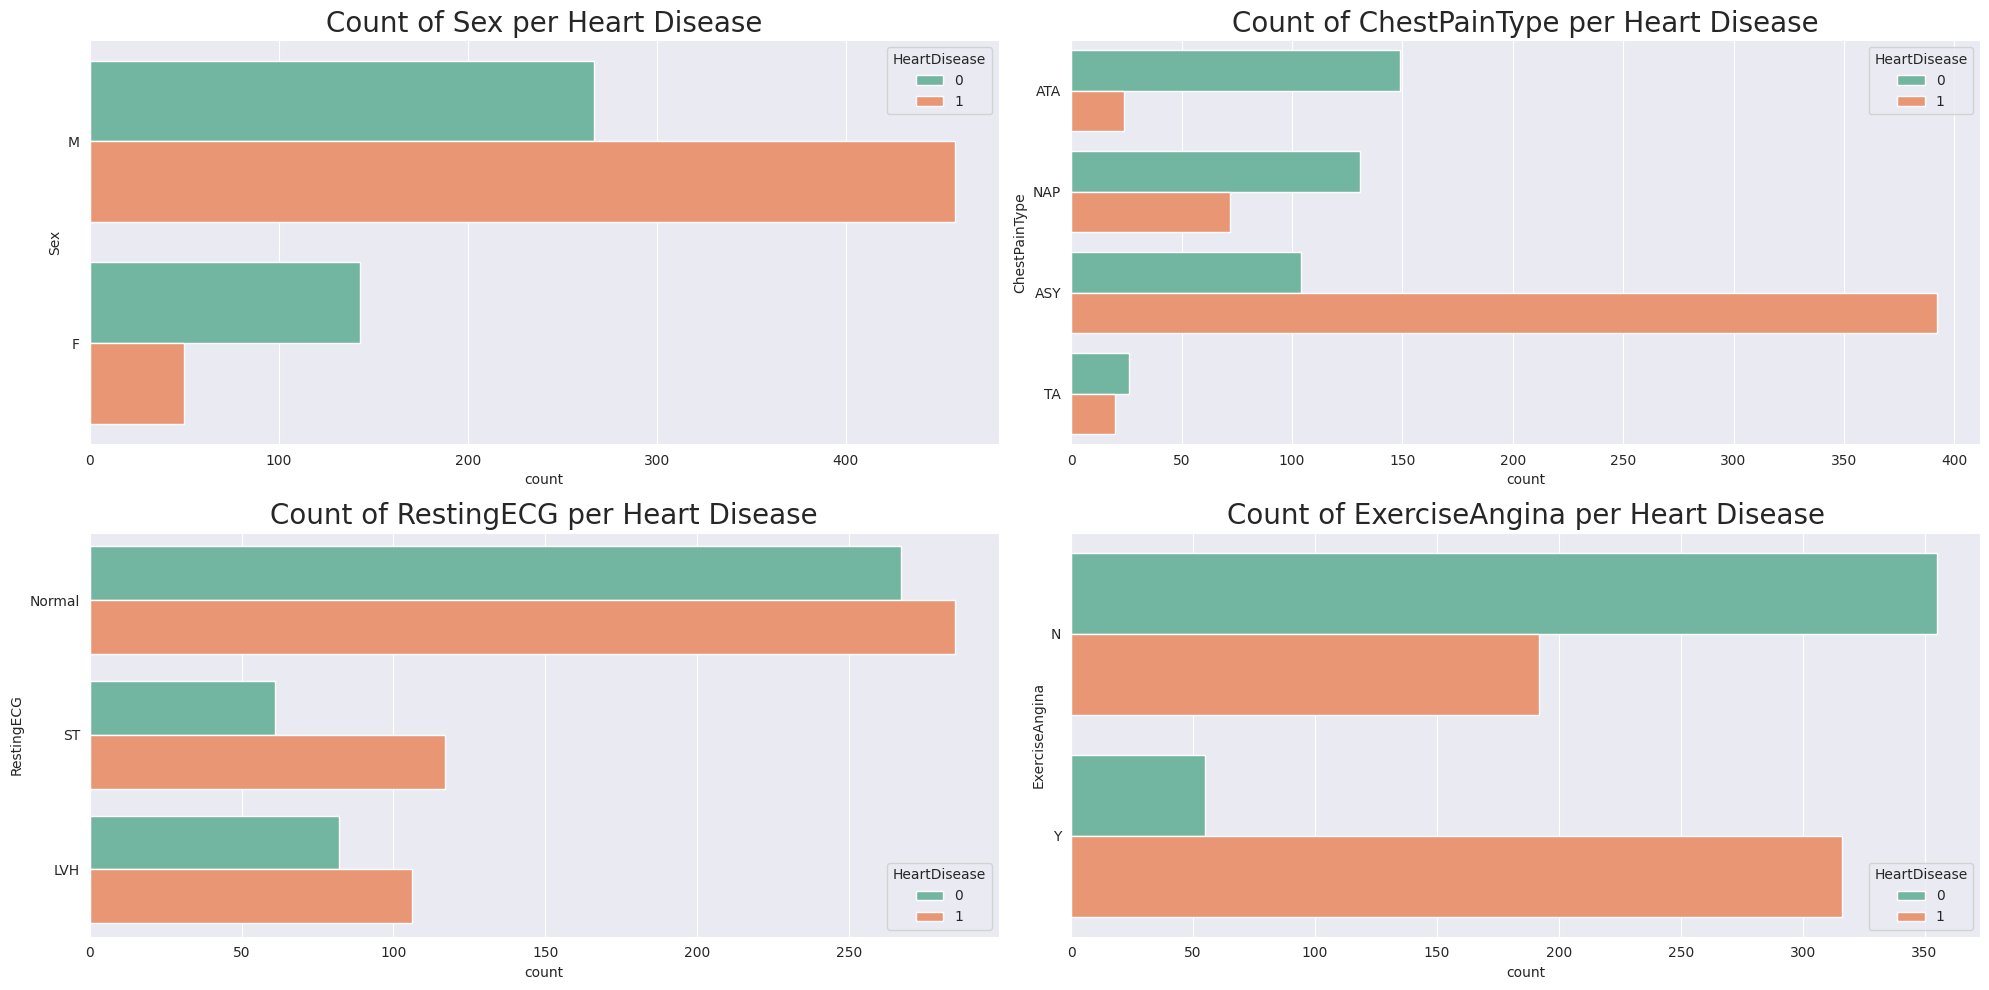

In [ ]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina' , 'ST_Slope']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.set_style('darkgrid')
idx = 0

# Iterate through your categorical columns
for row in range(2):
    for col in range(2):
        if idx < len(categorical_columns):
            sns.countplot(data=df, y=categorical_columns[idx], palette='Set2', orient='h', hue='HeartDisease',
                          ax=axes[row, col]).set_title(f'Count of {categorical_columns[idx]} per Heart Disease', fontsize=20)
            idx += 1

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Data Preparation

- One hot Encoding buat data kategorical
- Rescale data


In [ ]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_feature=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak' ]

min_scal=MinMaxScaler(feature_range=(0 , 1))

df[scale_feature] = min_scal.fit_transform(df[scale_feature])


In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,1,0,1,0,0,0,1


In [ ]:
# Expor data untuk digunakan kembali nanti

df.to_csv('Clean_Heart_Failure_Prediction.csv', index=False)

###Pisahkan Feature dari label

In [ ]:
# Pisahkan Feature yang digunakan sebagai input
features=[x for x in df if x not in "HeartDisease"]

In [ ]:
print(len(features))

15


In [ ]:
print(features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


### Split Dataset


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8)

In [ ]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5599


In [ ]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
379,0.448980,0.600,0.000000,0,0.676056,0.295455,1,0,0,0,0,1,1,0,1
665,0.285714,0.680,0.522388,0,0.457746,0.500000,1,0,0,0,1,0,1,1,0
398,0.489796,0.825,0.000000,1,0.436620,0.409091,1,0,0,0,1,0,1,0,1
870,0.877551,0.800,0.500829,0,0.718310,0.340909,0,1,0,0,1,0,0,0,1
511,0.714286,0.800,0.442786,1,0.197183,0.522727,1,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.346939,0.650,0.393035,0,0.774648,0.295455,0,1,0,0,1,0,0,0,1
489,0.530612,0.680,0.364842,0,0.563380,0.636364,1,0,0,0,1,0,1,1,0
473,0.653061,0.705,0.524046,1,0.436620,0.488636,1,0,1,0,0,1,1,1,0
610,0.530612,0.635,0.552239,1,0.661972,0.295455,0,0,0,0,0,1,0,1,0


#Tree

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix


def tree(X_train, X_val, y_train, y_val, MAX_DEPTH, MIN_SAMPLES_SPLIT):
  model = DecisionTreeClassifier(max_depth=MAX_DEPTH, min_samples_split=MIN_SAMPLES_SPLIT)

  model.fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)

  print(f"accuracy_train: {accuracy_train} ")
  print(f"accuracy_val: {accuracy_val} ")

  print('\nClassification Report:')
  print(classification_report(y_val,predictions_val))

  sns.heatmap(confusion_matrix(y_val,predictions_val),fmt='',annot=True)


accuracy_train: 0.9005449591280654 
accuracy_val: 0.842391304347826 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        87
           1       0.85      0.85      0.85        97

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



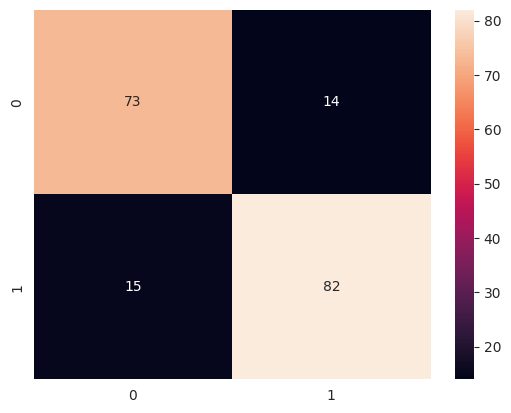

In [ ]:
tree(X_train, X_val, y_train, y_val, 8, 20)

**Hasil**

Didapatkan hasil yang terindikasi overfitting yang terlihat pada nilai akurasi pada trainingnya 100%. Untuk mengatasi hal tersebut, terdapat parameter yang dikonfigurasi untuk melihat hasilnya, yaitu:

```
max_depth dan min_samples_split
```

Setelah beberapa kali percobaan, max_depth = 8 dan min_samples_split = 25 menghasilkan performa yang paling bagus

### Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_training(X_train, X_val, y_train, y_val, max_depth, min_samples_split):
  model = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

  model.fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)

  print(f"accuracy_train: {accuracy_train} ")
  print(f"accuracy_val: {accuracy_val} ")
  print('\nClassification Report:')
  print(classification_report(y_val,predictions_val))

  sns.heatmap(confusion_matrix(y_val,predictions_val),fmt='',annot=True)


accuracy_train: 0.9059945504087193 
accuracy_val: 0.8641304347826086 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        87
           1       0.86      0.89      0.87        97

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



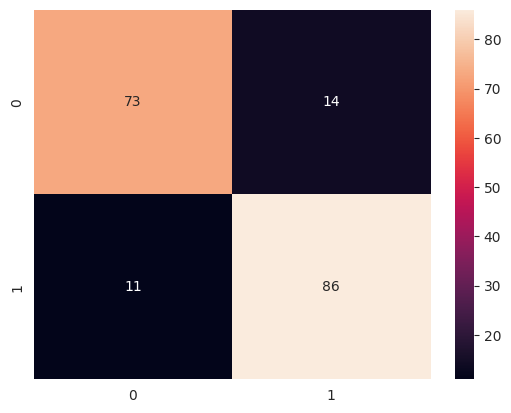

In [ ]:
random_forest_training(X_train, X_val, y_train, y_val, 8, 20)

### XGBoost

In [ ]:
from xgboost import XGBClassifier

def xg(X_train, X_val, y_train, y_val):
  model = XGBClassifier(alpha=2)

  model.fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)

  print(f"accuracy_train: {accuracy_train} ")
  print(f"accuracy_val: {accuracy_val} ")


  print('\nClassification Report:')
  print(classification_report(y_val,predictions_val))

  sns.heatmap(confusion_matrix(y_val,predictions_val),fmt='',annot=True)


accuracy_train: 0.9754768392370572 
accuracy_val: 0.8695652173913043 

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        87
           1       0.88      0.87      0.87        97

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



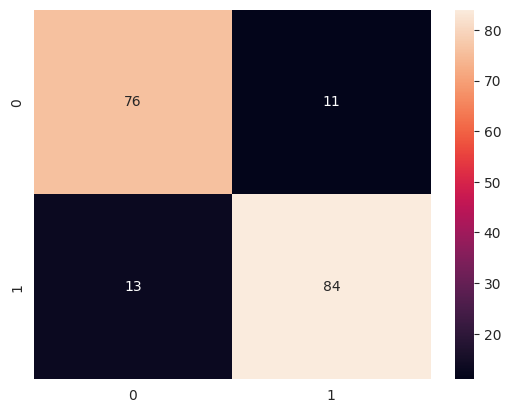

In [ ]:
xg(X_train, X_val, y_train, y_val)

nilai alpha dikonfigurasi sampai mendapatkan nilai yang tidak menunjukkan overfitting berlebih

# Oret-Oret

##ANN

In [ ]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
379,0.448980,0.600,0.000000,0,0.676056,0.295455,1,0,0,0,0,1,1,0,1
665,0.285714,0.680,0.522388,0,0.457746,0.500000,1,0,0,0,1,0,1,1,0
398,0.489796,0.825,0.000000,1,0.436620,0.409091,1,0,0,0,1,0,1,0,1
870,0.877551,0.800,0.500829,0,0.718310,0.340909,0,1,0,0,1,0,0,0,1
511,0.714286,0.800,0.442786,1,0.197183,0.522727,1,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.346939,0.650,0.393035,0,0.774648,0.295455,0,1,0,0,1,0,0,0,1
489,0.530612,0.680,0.364842,0,0.563380,0.636364,1,0,0,0,1,0,1,1,0
473,0.653061,0.705,0.524046,1,0.436620,0.488636,1,0,1,0,0,1,1,1,0
610,0.530612,0.635,0.552239,1,0.661972,0.295455,0,0,0,0,0,1,0,1,0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
X_train.shape[0]

(734, 15)
(734,)
(184, 15)
(184,)


734

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

In [ ]:


model =Sequential([
   Flatten(input_dim=X_train.shape[1]),
   #Dense(256, input_dim=X_train.shape[1]),
   Dense(128, activation='relu'),
   Dropout(0.2),
   Dense(32, activation='relu'),
   Dropout(0.2),
   Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               2048      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6209 (24.25 KB)
Trainable params: 6209 (

In [ ]:
hist = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/30
23/23 [==============================] - 1s 12ms/step - loss: 0.6468 - accuracy: 0.5749 - val_loss: 0.5752 - val_accuracy: 0.7174
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7929 - val_loss: 0.4586 - val_accuracy: 0.8315
Epoch 3/30
23/23 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8624 - val_loss: 0.4104 - val_accuracy: 0.8370
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8447 - val_loss: 0.4030 - val_accuracy: 0.8587
Epoch 5/30
23/23 [==============================] - 0s 5ms/step - loss: 0.3391 - accuracy: 0.8515 - val_loss: 0.4051 - val_accuracy: 0.8587
Epoch 6/30
23/23 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8597 - val_loss: 0.3966 - val_accuracy: 0.8533
Epoch 7/30
23/23 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8747 - val_loss: 0.3930 - val_accuracy: 0.8478
Epoch 8/30
23/23 [=

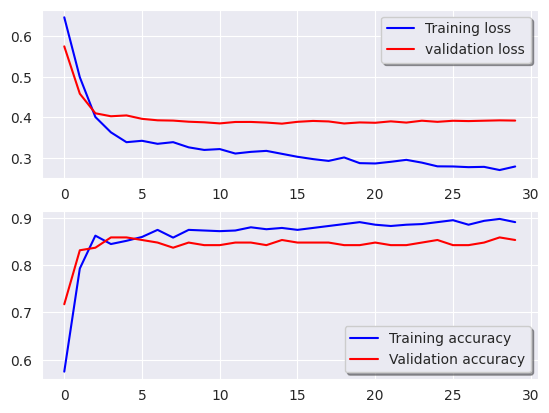

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
model.evaluate(X_val, y_val)

6/6 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.8533


[0.3923620283603668, 0.85326087474823]

In [ ]:
y_predict = model.predict(X_val)


6/6 [==============================] - 0s 3ms/step


In [ ]:
y_pred_binary = (y_predict > 0.5).astype(int)

In [ ]:
acc = round(accuracy_score(y_pred_binary,y_val) * 100, 2)
print(f"accuracy: {acc}")

accuracy: 85.33


<Axes: >

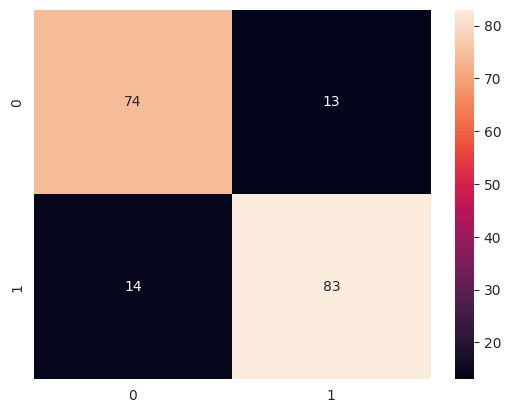

In [ ]:
ann_cm = confusion_matrix(y_val, y_pred_binary)
sns.heatmap(ann_cm,fmt='',annot=True)

## Clustering

### K_means

In [ ]:
### Mencoba mencari jumlah kalster yang sesuai
def K_means_cluster(X_train, max_cluster = 10):

    SSE = []
    K = []
    for cluster in range(1, max_cluster):
        kmeans = KMeans(n_clusters = cluster, n_init=10)
        kmeans.fit(X_train)
        SSE.append(kmeans.inertia_)
        K.append(cluster)

    return K, SSE

In [ ]:
K, SSE = K_means_cluster(X_train,10)

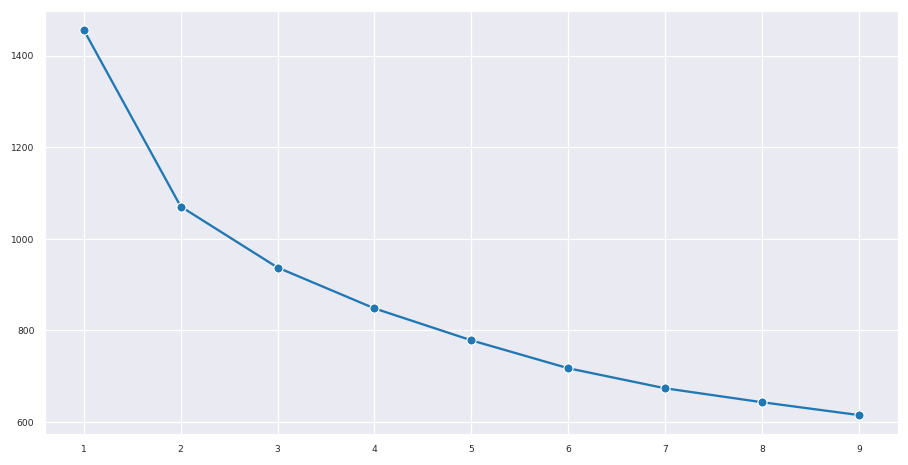

In [ ]:
with plt.rc_context(rc = {'figure.dpi': 110, 'axes.labelsize': 8,
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}):

    fig_8, ax_8 = plt.subplots(1, 1, figsize = (10, 5))
    sns.lineplot(x=K, y=SSE, marker = 'o')
    plt.xticks(range(1, 10))
    plt.show()


Dapat dilihat, "elbow" pada data tersebut cukup ambigu, sehingga klaster yang akan digunakan adalah 2 yang mengacu pada jumlah label pada data asli

In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(X_train)

#labels
labels = kmeans.labels_

# centroid
centroid = kmeans.cluster_centers_

In [ ]:
centroid

array([[ 5.61397440e-01,  6.67978208e-01,  3.20508033e-01,
         3.02663438e-01,  4.83647649e-01,  4.46648690e-01,
         8.47457627e-01,  5.08474576e-02,  1.79176755e-01,
         5.32687651e-02,  5.59322034e-01,  2.27602906e-01,
         6.22276029e-01,  8.81355932e-01, -1.83186799e-15],
       [ 4.70341408e-01,  6.51931464e-01,  3.46083704e-01,
         1.74454829e-01,  6.20442280e-01,  3.40201076e-01,
         7.16510903e-01,  3.42679128e-01,  2.64797508e-01,
         5.91900312e-02,  6.57320872e-01,  1.61993769e-01,
         1.52647975e-01,  1.44328993e-15,  9.78193146e-01]])

In [ ]:
labels

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


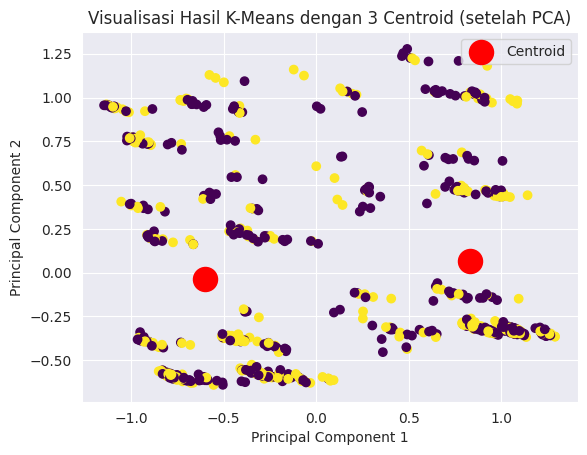

In [ ]:
# Membuat plot data dengan warna berdasarkan cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# Plot centroid
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroid')

plt.title('Visualisasi Hasil K-Means dengan 3 Centroid (setelah PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# Mencari nilai ARI dan NMI dengan membandingkan hasil clustering dengan label asli
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Hitung ARI
ari = adjusted_rand_score(y_train, labels)

# Hitung NMI
nmi = normalized_mutual_info_score(y_train, labels)

# Hitung accuracy
acc = accuracy_score(y_train,labels)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Accuracy: {acc}')


Adjusted Rand Index (ARI): 0.41612275028384876
Normalized Mutual Information (NMI): 0.32128018760026933
Accuracy: 0.1771117166212534


### Hierarchical

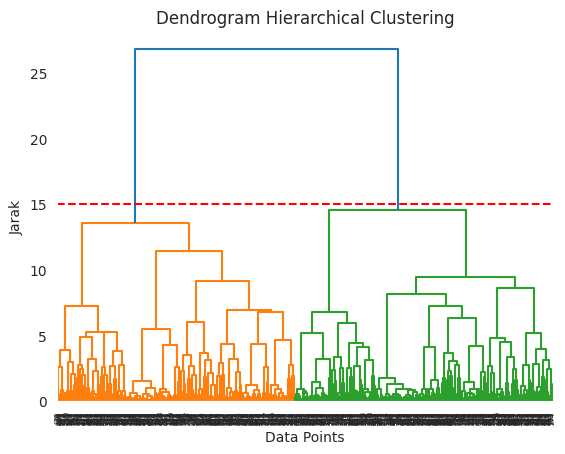

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Melakukan hierarchical clustering dengan linkage method 'ward'
linkage_matrix = linkage(X_train, method='ward')

# Membuat dendrogram
dendrogram(linkage_matrix)

# Menggambar garis pemotongan pada tingkat jarak tertentu
cut_off = 15  # Ganti dengan nilai jarak yang sesuai
plt.axhline(y=cut_off, color='r', linestyle='--')

plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Jarak')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Batas pemotongan yang sudah ditentukan
cut_off = 15

# Menggunakan fcluster untuk memberi label berdasarkan pemotongan
labels = fcluster(linkage_matrix, t=cut_off, criterion='distance')

# Label akan berisi angka 1 dan 2, yang menunjukkan kelompok ke mana setiap data point termasuk


In [ ]:
labels

array([1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,

In [ ]:
labels = [0 if x == 1 else 1 for x in labels]

In [ ]:
accuracy_score(y_train, labels)

0.7888283378746594

### BSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=50)
dbscan.fit(X_train)
labels = dbscan.labels_


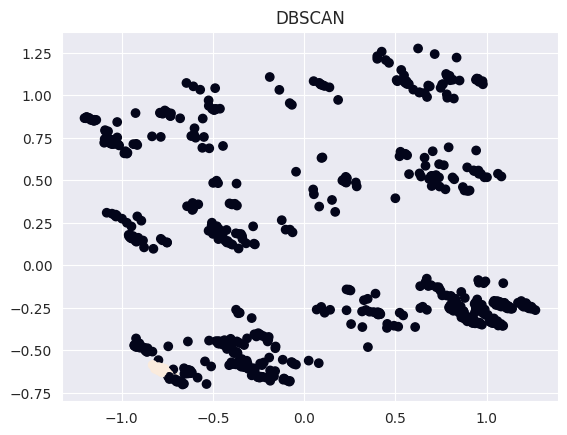

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN')
plt.show()
